### Learning data

In [1]:
import pandas as pd

df = pd.read_excel("Adidas US Sales Datasets.xlsx")

In [2]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [3]:
#Check whether 1 state only in 1 region?
states = df["State"].unique()
for state in states:
    region = df[df["State"]==state]["Region"].unique()
    if len(region) != 1:
        print("False")


In [4]:
#Check whether 1 city only in 1 state?
cities = df["City"].unique()
for city in cities:
    state = df[df["City"]==city]["State"].unique()
    if len(state) != 1:
        print("City: ",city," State:",state)


City:  Portland  State: ['Maine' 'Oregon']
City:  Charleston  State: ['South Carolina' 'West Virginia']


### Here we can decide to delete the column region because the state is unique with region.

In [5]:
#Check whether total_sales * operating_margin = operating_profit or not? 
a = (df["Total Sales"] * df["Operating Margin"] == df["Operating Profit"])
res_list = [i for i in range(len(a)) if a[i] == False]
res_list


[6187]

In [6]:
df.iloc[6187]

Retailer                    Foot Locker
Retailer ID                     1185732
Invoice Date        2021-01-09 00:00:00
Region                        Southeast
State                           Georgia
City                            Atlanta
Product                   Men's Apparel
Price per Unit                     47.0
Units Sold                          189
Total Sales                      8883.0
Operating Profit                4175.01
Operating Margin                   0.47
Sales Method                     Online
Name: 6187, dtype: object

## After all, I decide to remove the redundant columns: Region, Retailer_ID and Operating Margin

In [7]:
df_clean_columns = df.drop(columns = ["Retailer ID","Region","Operating Margin"])
df_clean_columns

,Retailer,Invoice Date,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,2020-01-01,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,In-store
1,Foot Locker,2020-01-02,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,In-store
2,Foot Locker,2020-01-03,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,In-store
3,Foot Locker,2020-01-04,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,In-store
4,Foot Locker,2020-01-05,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,In-store
...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,2021-01-24,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,Outlet
9644,Foot Locker,2021-01-24,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,Outlet
9645,Foot Locker,2021-02-22,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,Outlet
9646,Foot Locker,2021-02-22,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,Outlet


In [8]:
df_clean_columns.isna().sum()

Retailer            0
Invoice Date        0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

### Question 1. What is the best method for each sale retailer?

In [9]:
df_clean_columns

,Retailer,Invoice Date,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,2020-01-01,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,In-store
1,Foot Locker,2020-01-02,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,In-store
2,Foot Locker,2020-01-03,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,In-store
3,Foot Locker,2020-01-04,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,In-store
4,Foot Locker,2020-01-05,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,In-store
...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,2021-01-24,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,Outlet
9644,Foot Locker,2021-01-24,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,Outlet
9645,Foot Locker,2021-02-22,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,Outlet
9646,Foot Locker,2021-02-22,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,Outlet


In [10]:
df_q1 = df_clean_columns[["Retailer", "Operating Profit","Sales Method"]]
df_q1 = df_q1.groupby(["Retailer", "Sales Method"]).mean()
df_q1

Operating Profit
Retailer      Sales Method                  
Amazon        In-store          70839.724576
              Online            21706.909463
              Outlet            30026.407904
Foot Locker   In-store          62565.701559
              Online            19921.283900
              Outlet            31324.002232
Kohl's        In-store          73590.711806
              Online            19077.360851
              Outlet            49114.936226
Sports Direct In-store          70357.124573
              Online            23665.610603
              Outlet            40552.466277
Walmart       In-store         133253.378378
              Online            20935.360556
              Outlet            49243.500897
West Gear     In-store          78681.151645
              Online            15048.427470
              Outlet            24468.482931

In [11]:
df_q1.unstack()

Operating Profit                            
Sales Method          In-store        Online        Outlet
Retailer                                                  
Amazon            70839.724576  21706.909463  30026.407904
Foot Locker       62565.701559  19921.283900  31324.002232
Kohl's            73590.711806  19077.360851  49114.936226
Sports Direct     70357.124573  23665.610603  40552.466277
Walmart          133253.378378  20935.360556  49243.500897
West Gear         78681.151645  15048.427470  24468.482931

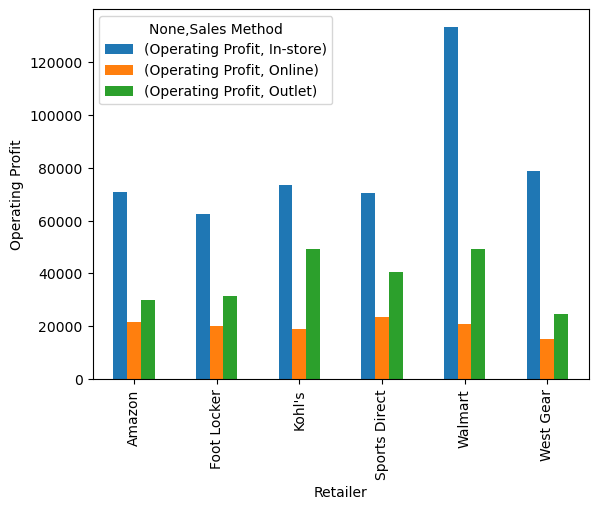

In [12]:
import matplotlib.pyplot as plt   

fig, ax = plt.subplots()
df_q1.unstack().plot(kind='bar', ax=ax)
ax.set_xlabel('Retailer')
ax.set_ylabel('Operating Profit')
plt.show()

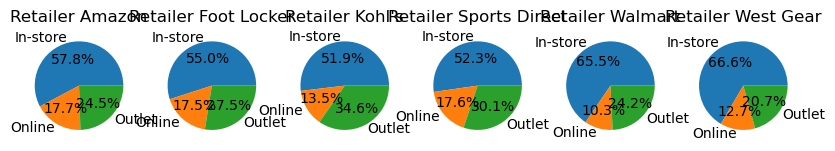

In [13]:
fig, axs = plt.subplots(1, 6, figsize=(10, 20))

for i, group in enumerate(df_q1.index.levels[0]):
    ax = axs[i]
    data = df_q1.loc[group, 'Operating Profit']
    ax.pie(data, labels=data.index, autopct='%1.1f%%')
    ax.set_title(f'Retailer {group}')

plt.show()

### Answer for question 1: 
- All the retailer has the highest profit in-store method, the highest one is Walmart retailer. 
- Moreover, Outlet also has the significant share, especially, in Kohl's brand, has 34.6% profit comes from Outlet. 
- After all, we can predict that, when people buy Adidas shoes, they tend to buy shoes in-store instead of online maybe to try them on for size. 

### Question 2. What is the most sale time in year for each sale retailer?
- This question I depend on the invoice date and assuming that each monthly invoice will be generated at the end of each month, without being deferred to another month

In [14]:
df_clean_columns["Invoice Date"].dt.year

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
9643    2021
9644    2021
9645    2021
9646    2021
9647    2021
Name: Invoice Date, Length: 9648, dtype: int64

In [15]:
df_clean_columns["Invoice Year"] = df_clean_columns["Invoice Date"].dt.year
df_clean_columns["Invoice Month"] = df_clean_columns["Invoice Date"].dt.month
df_clean_columns



,Retailer,Invoice Date,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Invoice Year,Invoice Month
0,Foot Locker,2020-01-01,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,In-store,2020,1
1,Foot Locker,2020-01-02,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,In-store,2020,1
2,Foot Locker,2020-01-03,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,In-store,2020,1
3,Foot Locker,2020-01-04,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,In-store,2020,1
4,Foot Locker,2020-01-05,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,In-store,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,2021-01-24,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,Outlet,2021,1
9644,Foot Locker,2021-01-24,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,Outlet,2021,1
9645,Foot Locker,2021-02-22,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,Outlet,2021,2
9646,Foot Locker,2021-02-22,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,Outlet,2021,2


In [16]:
df_q2 = df_clean_columns[["Invoice Year","Invoice Month","Operating Profit", "Retailer"]]
df_q2 = df_q2.groupby(["Retailer","Invoice Year", "Invoice Month"]).mean()
df_q2


Operating Profit
Retailer  Invoice Year Invoice Month                  
Amazon    2021         1                  24362.972581
                       2                  23866.842639
                       3                  21369.383472
                       4                  20527.413889
                       5                  32471.286111
...                                                ...
West Gear 2021         8                  42932.698333
                       9                  22067.891833
                       10                 23751.336748
                       11                 32992.681550
                       12                 47940.577923

[104 rows x 1 columns]

In [17]:
idx = df_q2.groupby(['Retailer', 'Invoice Year'])['Operating Profit'].idxmax()

# Lấy các hàng có chỉ mục tìm được
result = df_q2.loc[idx]

print(result)

                                          Operating Profit
Retailer      Invoice Year Invoice Month                  
Amazon        2021         7                  44648.600833
Foot Locker   2020         5                 124332.845000
              2021         8                  40819.821948
Kohl's        2020         12                 37908.271250
              2021         12                 45829.707833
Sports Direct 2020         5                  93911.977500
              2021         12                 49650.520702
Walmart       2020         5                  72406.012381
              2021         12                 63176.700000
West Gear     2020         9                 104886.134231
              2021         7                  53416.316519


### Answer for question 2:
- In December, May, July, August, September has the most sale times for overall retailer in year: 
    - December has a Christmas Day
    - July to September is the time of summer vacation

### Question 3: What is the best seller product for each retailer in particularly city and method

In [42]:
df_q3 = df_clean_columns[["Product", "Operating Profit","Retailer","City", "Sales Method"]]
df_q3 = df_q3.groupby(['Product', 'Sales Method',"Retailer","City"]).mean()
df_q3

Operating Profit
Product                 Sales Method Retailer    City                            
Men's Apparel           In-store     Amazon      Boston              44229.166667
                                                 Burlington          51208.333333
                                                 Manchester          47775.000000
                                     Foot Locker Baltimore           24750.000000
                                                 Charleston          61958.333333
...                                                                           ...
Women's Street Footwear Outlet       West Gear   Orlando              2444.333333
                                                 Philadelphia        41684.400000
                                                 Portland             5777.210769
                                                 Salt Lake City        871.813333
                                                 San Francisco       79752.662727

[1284 rows x 1 columns]

In [47]:
idx = df_q3.groupby(['Retailer'])['Operating Profit'].idxmax()

# Lấy các hàng có chỉ mục tìm được
result = df_q3.loc[idx]

result

Operating Profit
Product               Sales Method Retailer      City                        
Men's Street Footwear In-store     Amazon        Manchester        147240.000
                                   Foot Locker   New York          306250.000
                                   Kohl's        Cheyenne          201212.500
                                   Sports Direct Miami             282562.500
Women's Apparel       In-store     Walmart       Orlando           208500.000
Men's Street Footwear In-store     West Gear     Miami             305128.125

- Men's Street Footwear is the best seller of Manchester's Amazon, New York Foot Locker, Cheyenne Kohl's store, Miami Sports Direct store and Miami West Gear. 
- Walmart has different trend which is best seller product for Women's Apparel.